`02_pandas3.ipynb`

# 시계열 (Time Series) 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [5]:
# 다양한 날짜 형식 데이터 변환 시도
date_strings = [
    '2023-01-15',
    'Jan 15, 2023',
    '2023-01-15',
    '2023/08/05',
    '20230115',
    '15-Jan-2023',
    '2025년 8월 5일'
]
for date in date_strings:
    # 예외 처리 (에러 처리)
    try:
        parsed = pd.to_datetime(date)
        print(f'{date} -> {parsed}')
    except:
        print('err',date)


2023-01-15 -> 2023-01-15 00:00:00
Jan 15, 2023 -> 2023-01-15 00:00:00
2023-01-15 -> 2023-01-15 00:00:00
2023/08/05 -> 2023-08-05 00:00:00
20230115 -> 2023-01-15 00:00:00
15-Jan-2023 -> 2023-01-15 00:00:00
err 2025년 8월 5일


In [6]:
pd.to_datetime('2023-01-15')

Timestamp('2023-01-15 00:00:00')

In [87]:
# 시계열 인덱스 생성
# 날짜 범위 생성
dates_daily = pd.date_range('2023-01-01', '2023-12-31', freq='D')
dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')
dates_weekly = pd.date_range('2023-01-01', '2023-12-31', freq='W')

print(f"\n일별 날짜 (총 {len(dates_daily)}개): {dates_daily[:5].tolist()}...")
print(f"월별 날짜 (총 {len(dates_monthly)}개): {dates_monthly.tolist()}")
print(f"주별 날짜 (총 {len(dates_weekly)}개): {dates_weekly[:5].tolist()}...")

# 시계열 데이터프레임 생성
np.random.seed(42)

# 일별 매출 데이터 생성
daily_sales = pd.DataFrame({
    'date': dates_daily,
    'sales': np.random.normal(100000, 20000, len(dates_daily)) + 
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 7) * 10000 +  # 주간 패턴
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 365) * 30000   # 연간 패턴
})

# 음수 값 제거
daily_sales['sales'] = daily_sales['sales'].clip(lower=10000)

# date를 인덱스로 설정
daily_sales.set_index('date', inplace=True)

print("\n일별 매출 데이터:")
print(daily_sales.head())


일별 날짜 (총 365개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00')]...
월별 날짜 (총 12개): [Timestamp('2023-01-31 00:00:00'), Timestamp('2023-02-28 00:00:00'), Timestamp('2023-03-31 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-31 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-07-31 00:00:00'), Timestamp('2023-08-31 00:00:00'), Timestamp('2023-09-30 00:00:00'), Timestamp('2023-10-31 00:00:00'), Timestamp('2023-11-30 00:00:00'), Timestamp('2023-12-31 00:00:00')]
주별 날짜 (총 53개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-29 00:00:00')]...

일별 매출 데이터:
                    sales
date                     
2023-01-01  109934.283060
2023-01-02  105569.429486
2023-01-03  123735.698233
2023-01-04  136348.024536
2023-01-05   93042.167918


C:\Users\mingyu\AppData\Local\Temp\ipykernel_24132\2779952191.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')


In [45]:
daily_sales['요일1'] = daily_sales.index.day_name()
daily_sales

,sales,year,month,day,weekday,weekname,quarter,요일,요일1
date,,,,,,,,,
2023-01-01,109934.283060,2023,1,1,6,Sunday,1,6,Sunday
2023-01-02,105569.429486,2023,1,2,0,Monday,1,0,Monday
2023-01-03,123735.698233,2023,1,3,1,Tuesday,1,1,Tuesday
2023-01-04,136348.024536,2023,1,4,2,Wednesday,1,2,Wednesday
2023-01-05,93042.167918,2023,1,5,3,Thursday,1,3,Thursday
...,...,...,...,...,...,...,...,...,...
2023-12-27,112146.823714,2023,12,27,2,Wednesday,4,2,Wednesday
2023-12-28,124251.868065,2023,12,28,3,Thursday,4,3,Thursday
2023-12-29,86526.927892,2023,12,29,4,Friday,4,4,Friday


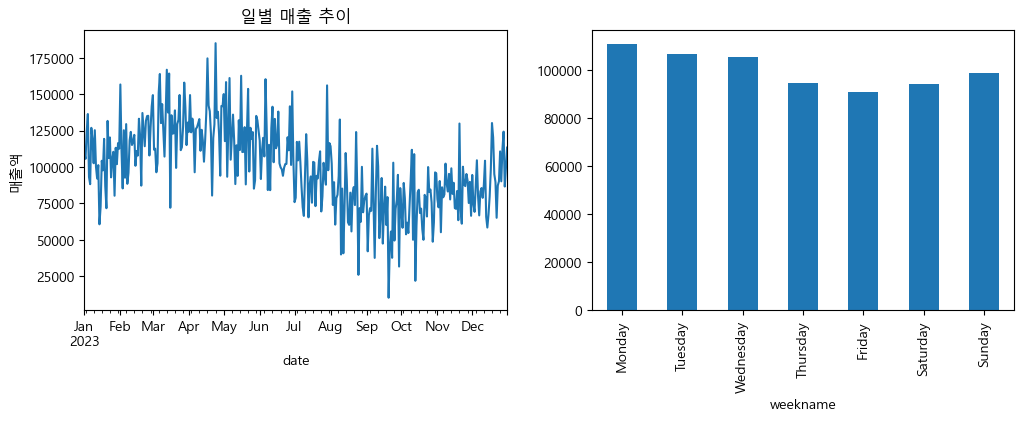

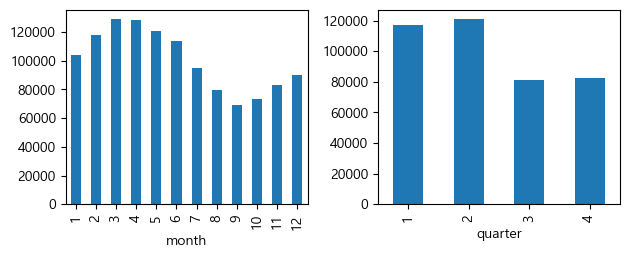

In [91]:
# Index (datetime index 라서 바로 접근)
daily_sales['year'] = daily_sales.index.year
daily_sales['month'] = daily_sales.index.month
daily_sales['day'] = daily_sales.index.day
daily_sales['weekday'] = daily_sales.index.weekday
daily_sales['weekname'] = daily_sales.index.day_name()
daily_sales['quarter'] = daily_sales.index.quarter

daily_sales.head()

# 요일별 평균 매출
weekname_sales = daily_sales.groupby('weekname')['sales'].mean()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = weekname_sales.reindex(weekday_order)

plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
daily_sales['sales'].plot()
plt.title('일별 매출 추이')
plt.ylabel('매출액')

plt.subplot(2, 2, 2)
weekday_avg.plot(kind = 'bar')
plt.show()
plt.subplot(2,2,3)
monthly_avg = daily_sales.groupby('month')['sales'].mean()
monthly_avg.plot(kind = 'bar')
plt.subplot(2, 2, 4)
quarter_avg = daily_sales.groupby('quarter')['sales'].mean()
quarter_avg.plot(kind = 'bar')
plt.tight_layout()
plt.show()

In [46]:
daily_sales.loc['2023-04']

,sales,year,month,day,weekday,weekname,quarter,요일,요일1
date,,,,,,,,,
2023-04-01,124116.291222,2023,4,1,5,Saturday,2,5,Saturday
2023-04-02,149372.622003,2023,4,2,6,Sunday,2,6,Sunday
2023-04-03,123774.752707,2023,4,3,0,Monday,2,0,Monday
2023-04-04,133182.424610,2023,4,4,1,Tuesday,2,1,Tuesday
2023-04-05,126463.065796,2023,4,5,2,Wednesday,2,2,Wednesday
2023-04-06,96328.378472,2023,4,6,3,Thursday,2,3,Thursday
2023-04-07,126072.893472,2023,4,7,4,Friday,2,4,Friday
2023-04-08,127255.949952,2023,4,8,5,Saturday,2,5,Saturday
2023-04-09,129899.974611,2023,4,9,6,Sunday,2,6,Sunday


In [64]:
# 조건부 필터링(weekname 컬림이 Friday)
daily_sales[daily_sales['weekname'] =='Friday']

# 특정 월의 주말만 (6월)
june = daily_sales.loc['2023-06']
weekend_mask = daily_sales.loc['2023-06']['weekday'].isin([5,6])
june[weekend_mask]

,sales,year,month,day,weekday,weekname,quarter,요일,요일1
date,,,,,,,,,
2023-06-03,111414.940332,2023,6,3,5,Saturday,2,5,Saturday
2023-06-04,119996.234696,2023,6,4,6,Sunday,2,6,Sunday
2023-06-10,84019.290727,2023,6,10,5,Saturday,2,5,Saturday
2023-06-11,126593.103997,2023,6,11,6,Sunday,2,6,Sunday
2023-06-17,138027.509610,2023,6,17,5,Saturday,2,5,Saturday
2023-06-18,102502.903094,2023,6,18,6,Sunday,2,6,Sunday
2023-06-24,102089.477070,2023,6,24,5,Saturday,2,5,Saturday
2023-06-25,120406.110304,2023,6,25,6,Sunday,2,6,Sunday


In [66]:
# 마지막 10일간의 데이터 
daily_sales.tail()

,sales,year,month,day,weekday,weekname,quarter,요일,요일1
date,,,,,,,,,
2023-12-27,112146.823714,2023,12,27,2,Wednesday,4,2,Wednesday
2023-12-28,124251.868065,2023,12,28,3,Thursday,4,3,Thursday
2023-12-29,86526.927892,2023,12,29,4,Friday,4,4,Friday
2023-12-30,99183.271269,2023,12,30,5,Saturday,4,5,Saturday
2023-12-31,113286.479150,2023,12,31,6,Sunday,4,6,Sunday


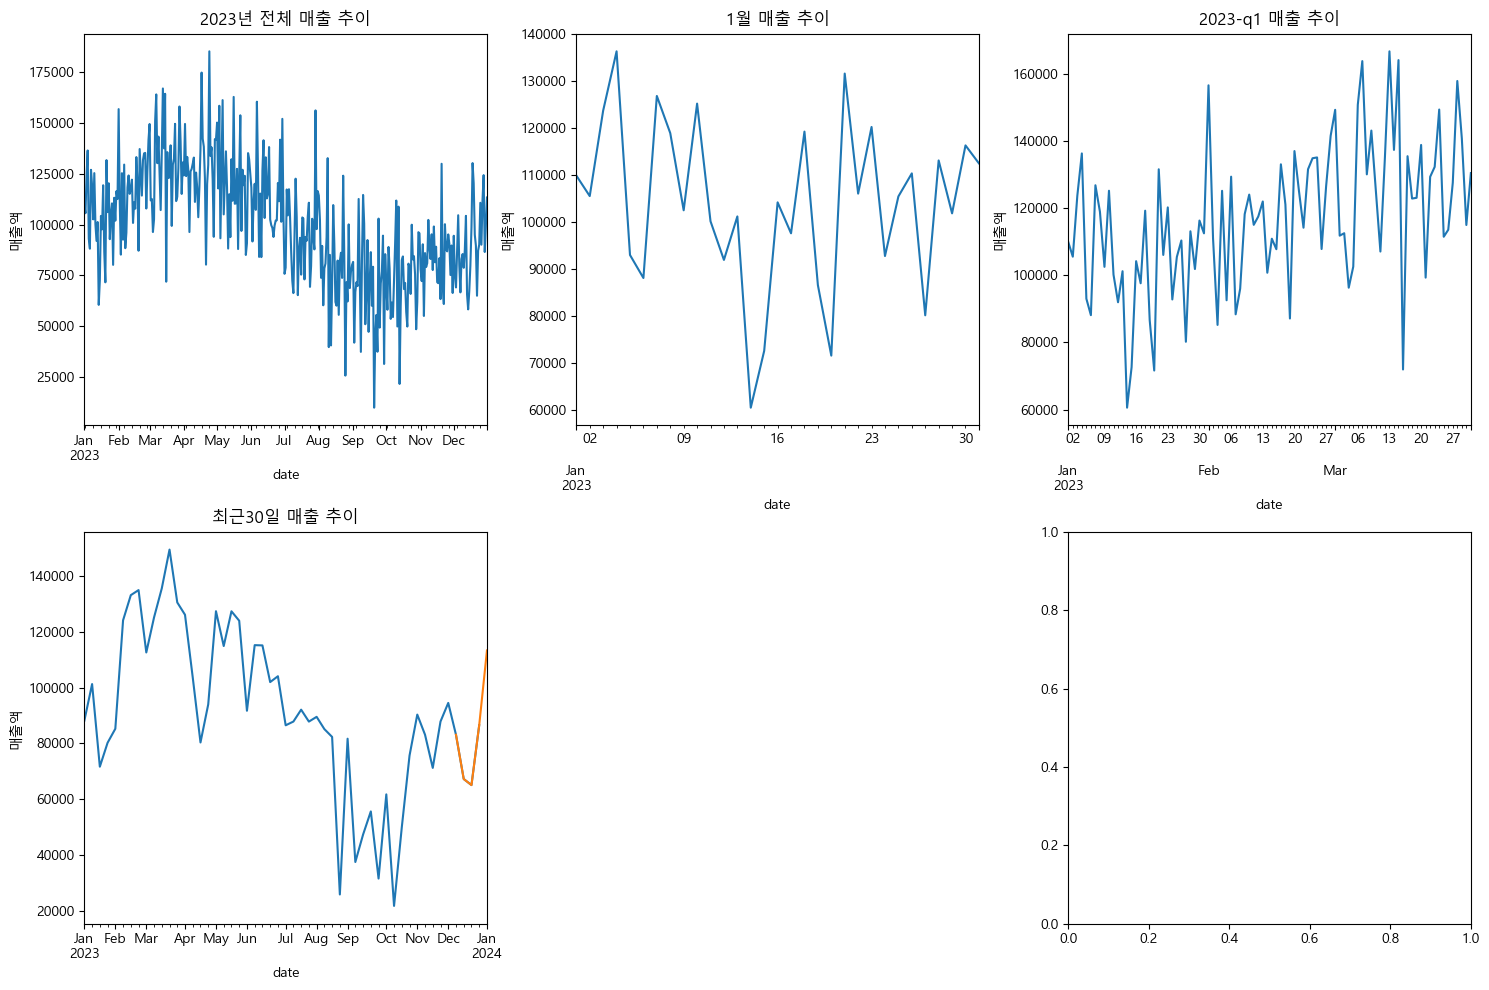

In [ ]:
import matplotlib.pyplot as plt

# 전체 figure와 subplot 6개 정의
plt.figure(figsize=(15, 10))

# 1. 2023년 전체 매출 추이
plt.subplot(2, 3, 1)
daily_sales['sales'].plot()
plt.title('2023년 전체 매출 추이')
plt.ylabel('매출액')

# 2. 1월 데이터
plt.subplot(2, 3, 2)
jan_data = daily_sales.loc['2023-01']
jan_data['sales'].plot()
plt.title('1월 매출 추이')
plt.ylabel('매출액')

# 3. 1분기 데이터
plt.subplot(2, 3, 3)
q1_data = daily_sales[daily_sales['quarter'] == 1]
q1_data['sales'].plot()
plt.title('2023-q1 매출 추이')
plt.ylabel('매출액')

# 4. 금요일 매출 추이
plt.subplot(2, 3, 4)
fri_data = daily_sales[daily_sales['weekname'] == 'Friday']
fri_data['sales'].plot()
plt.title('금요일 매출 추이')
plt.ylabel('매출액')

# 5. 최근 30일 데이터
last_30_data = daily_sales.tail(30)
last_30_data['sales'].plot()
plt.title('최근30일 매출 추이')
plt.ylabel('매출액')

# 6. 월별 박스플롯
plt.subplot(2,3,6)

all_month = []

for m in range(1, 13):
    all_month.append(daily_sales[daily_sales['month']== m]['sales'].values)

all_month = []
# 전체 레이아웃 정리 + 한번에 출력
plt.tight_layout()
plt.show()


In [88]:
daily_sales1 = daily_sales.tail(30)
daily_sales1

,sales
date,
2023-12-02,74427.271040
2023-12-03,69128.040861
2023-12-04,87484.089865
2023-12-05,104561.027955
2023-12-06,80081.078559
2023-12-07,66700.946619
2023-12-08,83079.825432
2023-12-09,85511.114410
2023-12-10,78769.400206


In [99]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------  9.4/9.6 MB 50.4 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 45.7 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- --------

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 시계열 데이터 추세, 계절성 분해 함수
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# 월 기준으로 리샘플링 (시간 간격 재조정)
daily_sales.resample('M')['sales'].mean()


C:\Users\mingyu\AppData\Local\Temp\ipykernel_24132\2779307997.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = daily_sales.resample('M')['sales'].mean()


<Axes: xlabel='quarter', ylabel='sales'>

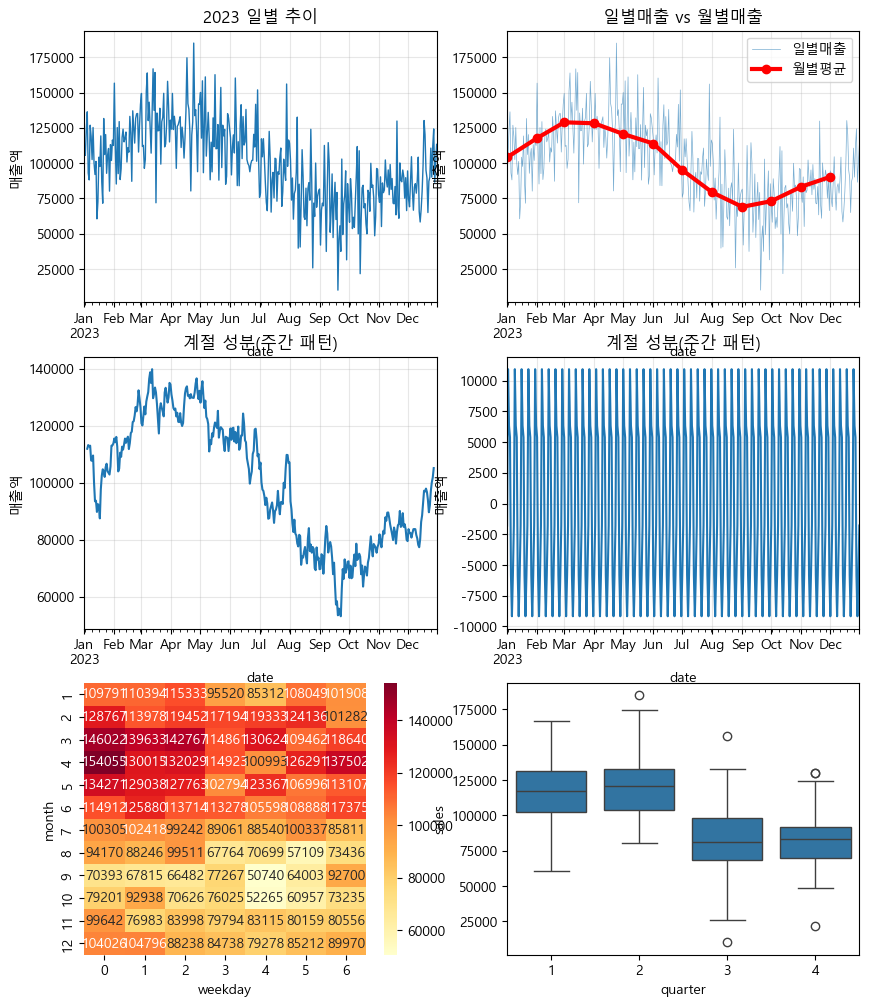

In [ ]:
plt.figure(figsize = (10, 12))

# 전체 추이
plt.subplot(3, 2, 1)
daily_sales['sales'].plot(linewidth = 1)
plt.grid(True, alpha =0.3)
plt.title('2023 일별 추이')
plt.ylabel('매출액')

plt.subplot(3,2,2)
daily_sales['sales'].plot(linewidth = 0.5, alpha = 0.6, label = '일별매출')
# 일단위 -> 월단위 간격 재조정 후 평균 내기
monthly_avg = daily_sales.resample('M')['sales'].mean()
monthly_avg.plot(linewidth = 3, marker = 'o', label = '월별평균', color = 'red')

plt.title('일별매출 vs 월별매출')
plt.ylabel('매출액')
plt.grid(True, alpha = 0.3)
plt.legend()

#계절성 패턴(분해) -> 
# Trend(추세) -> 전반적인 방향성 (증가/ 감소), 
# Seasonal(계절) -> 주기적 반복), 
# Residual(잔차-> )
plt.subplot(3,2,3)
decomp = seasonal_decompose(daily_sales['sales'], model = 'additive', period = 7) #덧셈 모델, 주간패턴
decomp.trend.plot()
plt.title('계절 성분(주간 패턴)')
plt.ylabel('매출액')
plt.grid(True, alpha = 0.3)

# 7일 이동평균으로 계절성 확인 
plt.subplot(3, 2, 4)
decomp.seasonal.plot()
plt.title('계절 성분(주간 패턴)')
plt.ylabel('매출액')
plt.grid(True, alpha = 0.3)
# 히트맵(HeatMap) - 월별, 요일별
plt.subplot(3, 2, 5)
pt = daily_sales.pivot_table(
    values = 'sales',
    index = 'month',
    columns = 'weekday', 
    aggfunc = 'mean'
)
#           히트맵 숫자표시, 숫자 형식, 색깔(Yellow -> Orange -> Red)
sns.heatmap(pt, annot = True, fmt='.0f', cmap = 'YlOrRd')

# 분기별 박스플롯
plt.subplot(3,2,6)
sns.boxplot(x= 'quarter', y= 'sales', data = daily_sales)
plt.xlabel('분기')
plt.ylabel('매출액')
# plt.tight_layout()
# plt.show()

AttributeError: 'Series' object has no attribute 'plt'

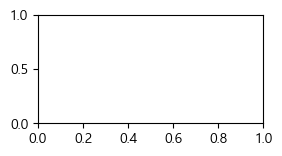

In [139]:
# 주간 패턴 (요일별 평균 매출)

plt.subplot(3,2,1)
daily_sales.groupby('weekname')['sales'].mean().plt()